# Crime and the Human Development Index

As aforementioned, crime prevention cannot be fulfilled by the presence and/or 
increase of only surveillance cameras. In order to prevent crime, there is a sociological 
demand to dismantle the multitude of indicators predicting crime. Therefore, the following section will dive deeper into diverse demographic and socio-economic factors that predict crime rates. To achieve this, the Human Development Index (HDI) will be inspected


## HDI per country

The HDI measures average achievement of three key dimensions: a long and healthy life, knowledge reproduction, and living standards. Indicators of these dimensions evolve around aspects, like life expectancy, years of schooling, and gross national income. To be clear, the higher the HDI index value, the ‘better’ you could say a country is.

As seen in the annual report, there is an overall global increase over time of overall HDI-levels per country. However, human development is unequally distributed over the nations, representing global inequalities. We will delve more into what this metric means for the crime index for a country.

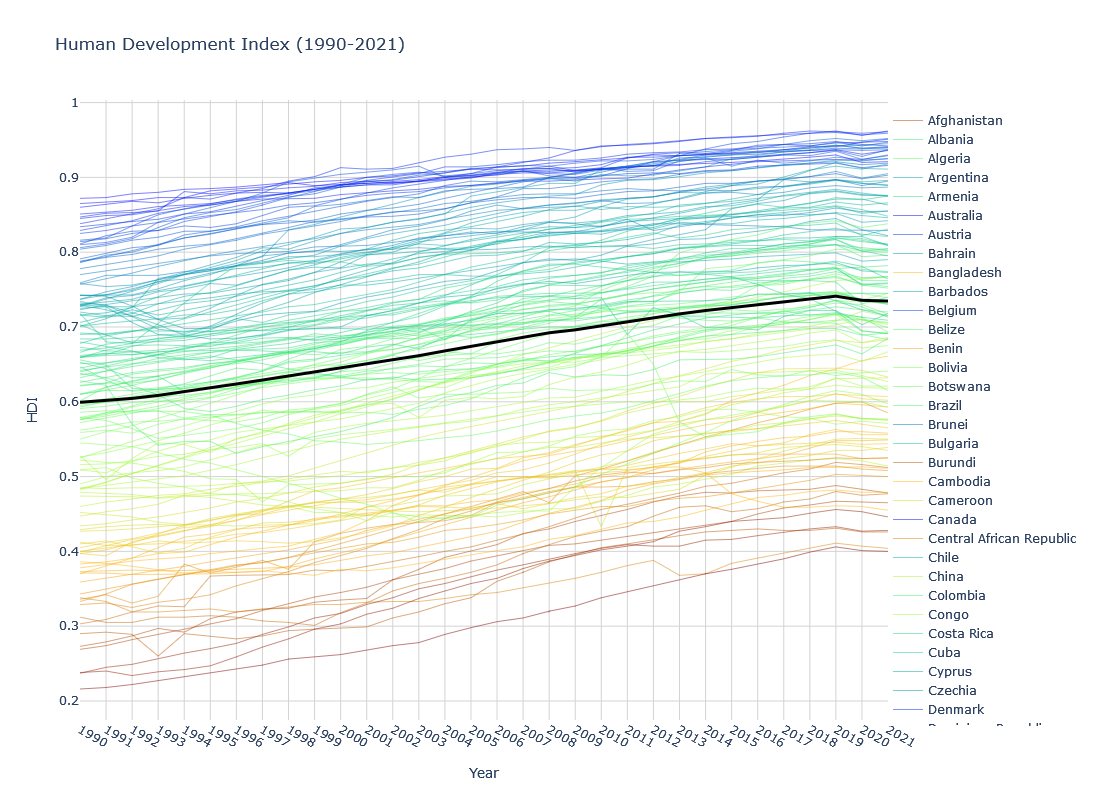

In [16]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from dash import Dash, dcc, html
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

import matplotlib.pyplot as plt
import numpy as np

HDI_full = pd.read_csv("datasets/Human Development Index.csv")

HDI_full = HDI_full.groupby('Country').first()

columns = ["Human Development Index (" + str(i) + ")" for i in range(1990, 2022)]

# filter data 2021
HDI = HDI_full[columns]

# Rename some countries for clarity
HDI.rename({'The Democratic Republic of the Congo':'DRC'}, inplace = True)

# Identify the columns related to the Human Development Index from 1990 to 2022
hdi_columns = [col for col in HDI.columns]

# Filter the dataframe to include only the required columns
filtered_HDI = HDI.dropna()

hdi_data = filtered_HDI

# Normalize the first year's HDI values for color mapping
first_year = hdi_data.columns[1]
first_year_values = hdi_data[first_year].values
norm = plt.Normalize(first_year_values.min(), first_year_values.max())
colors = plt.cm.rainbow(norm(first_year_values))

# Create the plotly figure
fig = go.Figure()

# year legend
years = [str(year) for year in range(1990, 2022)]

# Add traces for each country with color mapping based on the first year's HDI value
for i in range(len(hdi_data.index)):
    index = i
    row = hdi_data.iloc[i]
    country_color = 'rgb(' + str(int(256 - (colors[index][0] * 255)))\
    + "," + str(int((colors[index][1] * 255))) + "," + str(int(256 - (colors[index][2] * 255))) + ")"
    country_data = row[:].dropna()
    fig.add_trace(go.Scatter(
        x=years,
        y=country_data,
        mode='lines',
        line=dict(width=0.5, color=country_color),
        showlegend=True,
        name = hdi_data.index[i]
    ))


# Calculate and plot the world average HDI
world_avg = hdi_data.iloc[:, :].mean(axis=0)
fig.add_trace(go.Scatter(
    x=years,
    y=world_avg,
    mode='lines',
    line=dict(width=3, color='black'),
    name='World Mean'
))

# Update layout
fig.update_layout(
    title='Human Development Index (1990-2021)',
    xaxis_title='Year',
    yaxis_title='HDI',
    showlegend=True,
    legend=dict(orientation="v", yanchor="top", y=0.99, xanchor="left", x=1),
    plot_bgcolor='white',
    autosize = True,
    height = 800
)

# Customize hover label formatting
fig.update_traces(
    hovertemplate='Year: %{x}<br>HDI: %{y}'
)

# Add gridlines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey')

# Show the figure
fig.show()
